In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# ECS766 Coursework 3 - Elliot Linsey

## Q1:

Computing the support of every subset of an itemset can lead to numbers too large for a computer to compute or store. This is because if we have a large itemset, then we have to compute every combination of items within to calculate every support. The equation to calculate the number of itemsets within a large itemset is $2^n-1$, with n being the number of items within your itemset. If we had an itemset of 100 items, the equation would be $2^{100}-1 \approx 1.27\times10^{30}$, this resulting number is too large to be handled by the computer.  

The apriori algorithm is used to reduce the amount of calculations involved by using apriori knowledge that the subset of a frequent itemset is also frequent. Therefore, if an itemset in $L_k$ is frequent then the corresponding subsets are also frequent. Using this knowledge, it can find the initial candidate itemsets, $C_1$, use this to find the frequent itemsets $L_1$ by comparing with the previously decided support count. Then, generate the next set of candidates $C_2$, or superset, of the original candidates by joining $L_1 \Join L_1$. After joining, you create $L_2$ by pruning the candidates of $C_2$ that lack frequent itemsets. As you are removing infrequent itemsets as you go through the algorithm, you do not need to calculate every single itemset support as you only keep the itemsets that meet your predetermined support level. 

## Q2:

If $L_1$ contains the initial frequent itemsets, then every $k\geq2$ must be a superset of $L_1$ because the apriori rule has the attribute of antimonotonicity. This refers to the fact that if a set cannot pass the support test, then all supersets will also fail. Therefore, for all sets in $k\geq2$, they must be made from an itemset of $L_1$ (that passes the support test), otherwise they too will not pass the support test. 

## Q3:

$C_3$ = {{1,2,4},{2,3,4}}

## Q4:

As $S_2$ is a subset of $S_1$, therefore the support of $S_2$ will be $\geq$ the support of $S_1$

## Q5:

0.8

## Q6:

Maximum length of 6: (Dill, Yogurt, Nutmeg, Onion, Kidney Beans, Eggs) or (Yogurt, Nutmeg, Milk, Onion, Kidney Beans, Eggs)	

## Q7:

In [2]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [3]:
def K_measure(dataset,A,B):
    count1 = 0
    count2 = 0
    count3 = 0
    for x in dataset:
        if set(A).issubset(set(x)) and set(B).issubset(set(x)):
            count1 += 1
        if set(A).issubset(set(x)):
            count2 += 1
        if set(B).issubset(set(x)):
            count3 += 1       
    supportAB = count1/len(dataset)
    conA = count1/count2
    conB = count1/count3
    return (conA+conB)/2
print('Kulczynski({Onion}, {Kidney Beans, Eggs}): ' + str(K_measure(dataset, ['Onion'], ['Kidney Beans','Eggs'])))     

Kulczynski({Onion}, {Kidney Beans, Eggs}): 0.875


## Q8:

In [4]:
def imb_ratio(dataset,A,B):
    count1 = 0
    count2 = 0
    count3 = 0
    for x in dataset:
        if set(A).issubset(set(x)) and set(B).issubset(set(x)):
            count1 += 1
        if set(A).issubset(set(x)):
            count2 += 1
        if set(B).issubset(set(x)):
            count3 += 1       
    supportA = count2/len(dataset)
    supportB = count3/len(dataset)
    supportAUB = count1/len(dataset)
    #print(supportA,supportB,supportAUB)
    conA = count1/count2
    conB = count1/count3
    return abs(supportA-supportB)/(supportA+supportB-supportAUB)
print('Imbalance Ratio({Onion}, {Kidney Beans, Eggs}: ' + str(imb_ratio(dataset, ['Onion'], ['Kidney Beans','Eggs'])))
#imb_ratio(dataset2, ['Eggs'], ['Kidney Beans'])  

Imbalance Ratio({Onion}, {Kidney Beans, Eggs}: 0.2500000000000001


## Part 2

In [5]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

## Q1:

The contextual attribute in a case of credit card fraud could be the specific persons transaction history. If the majority of purchases range from £10 to £1000, then suddenly a purchase of £10000 is made, this could be an instance of credit card fraud as it appears to be generated from a deviation from the normal. In this case, the contextual attribute is the specific persons transaction history because the outlier detection relies on the previous transactions that this person has made and for each new transaction to be compared to. The behavioural attribute is the cost of the purchase as this is being used to evaluate whether the purchase is an outlier in the context of the persons previous purchases. 

Another contextual attribute in credit card fraud could be location. If the majority of purchases using the card are made from London and then there is an unexplained purchase registered from Albania, this could be a deviation from the norm and be considered an outlier. In this case, the contextual attribute could be classed as the persons usual residence or location as this is where the majority of credit card uses are expected to be from. The behavioural attribute would be classed as transaction location as this is what you would be comparing to the contextual attribute, for instance, does a one off purchase from Albania match with this specific persons context of being UK based?  

## Q2:

We could use a proximity-based outlier detection method. By firstly standardising and using a PCA technique to reduce the number of dimensions to two principal components, then using K-Nearest Neighbors to identify datapoints that are not close to other datapoints. In this case, there are two classes so we could initially cluster according to these two classes to see the distribution of the datapoints. Our definition of an outlier would be datapoints that do not appear to fit the general trend for either of these two classes and appear distant from both the respective cluster and from other datapoints, I would choose this method because the KNN outlier method would identify these outliers that do not fit the trend of either benign or malignant using the chosen features. Therefore, these benign or malignant tumors may be caused by something not recorded in our data and being able to identify that these datapoints are from separate distributions may lead us to investigate further into other breast cancer causes. I've created an example below demonstrating KNN outlier detection.   

(I have also plotted a distance based method, this scores datapoints higher the further away they are from their respective cluster mean. This is because from the initial PCA plot we can see datapoints classed as benign being very similar to malignant and vice versa, I wanted to see if this method was effective at identifying them. However, in doing so you class quite a lot of data as outliers so this may not be optimal if one class has a high level of variance.)

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data = data.drop(['Sample code'],axis=1)
data = data.replace('?',np.NaN)
data = data.dropna().reset_index(drop=True)
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


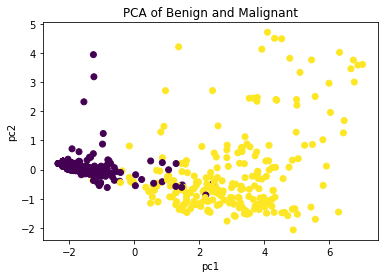

In [7]:
scaler = StandardScaler()
X1 = data.iloc[:,:-1].to_numpy()
X1 = scaler.fit_transform(X1)
pca = PCA(n_components=2)
projected1 = pca.fit_transform(X1)

projected1 = pd.DataFrame(projected1,columns=['pc1','pc2'])
projected1['class'] = data['Class']
#projected1.head()
plt.scatter(projected1.pc1,projected1.pc2,c=projected1['class'])
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('PCA of Benign and Malignant')
plt.show()

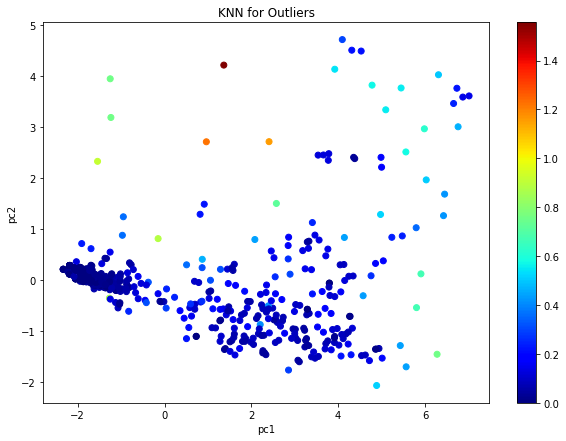

In [8]:
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance
import seaborn as sns
knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(projected1)
distances, indices = nbrs.kneighbors(projected1.values)

# The outlier score is set as the distance between the point and its k-th nearest neighbour
outlier_score = distances[:,knn-1]
projected1['score'] = outlier_score
plt.figure(figsize=(10,7))
plt.scatter(x=projected1.pc1,y=projected1.pc2,c=projected1.score,cmap='jet')
plt.title('KNN for Outliers')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.colorbar()
plt.show()

In [9]:
display(projected1.nlargest(5,'score'))
display(data.iloc[63])

,pc1,pc2,class,score
63,1.366339,4.211204,4,1.556388
103,0.963989,2.707723,4,1.225128
270,2.408255,2.709960,4,1.160682
8,-1.542311,2.324003,2,0.913645
342,-0.147306,0.808885,4,0.884425


Clump Thickness                10
Uniformity of Cell Size         4
Uniformity of Cell Shape        2
Marginal Adhesion               1
Single Epithelial Cell Size     3
Bare Nuclei                     2
Bland Chromatin                 4
Normal Nucleoli                 3
Mitoses                        10
Class                           4
Name: 63, dtype: object

In [10]:
projected1['location'] = projected1.apply(lambda row: np.array([row['pc1'],row['pc2']]),axis=1)
projected1.head()

,pc1,pc2,class,score,location
0,-1.470171,-0.104273,2,3.690552e-15,"[-1.4701712405363991, -0.1042731490581584]"
1,1.442046,-0.570141,2,4.315989e-02,"[1.442046409821655, -0.5701414283777572]"
2,-1.592478,-0.076120,2,2.654234e-02,"[-1.5924776910536071, -0.07611987003760556]"
3,1.479812,-0.528452,2,5.625157e-02,"[1.4798116752823125, -0.5284518096485157]"
4,-1.344862,-0.090719,2,6.938894e-17,"[-1.3448616872911923, -0.09071904712174989]"


In [11]:
from scipy.spatial import distance as dist
class2 = projected1.location[projected1['class'] == 2]
class2_mean = np.mean(class2)
class4 = class2 = projected1.location[projected1['class'] == 4]
class4_mean = np.mean(class4)
projected1['distance'] = projected1.apply(lambda row: dist.euclidean(row['location'], class2_mean) if row['class'] == 2 else 
                                         dist.euclidean(row['location'], class4_mean),axis=1)
projected1.head()

,pc1,pc2,class,score,location,distance
0,-1.470171,-0.104273,2,3.690552e-15,"[-1.4701712405363991, -0.1042731490581584]",0.226682
1,1.442046,-0.570141,2,4.315989e-02,"[1.442046409821655, -0.5701414283777572]",3.112174
2,-1.592478,-0.076120,2,2.654234e-02,"[-1.5924776910536071, -0.07611987003760556]",0.156980
3,1.479812,-0.528452,2,5.625157e-02,"[1.4798116752823125, -0.5284518096485157]",3.140765
4,-1.344862,-0.090719,2,6.938894e-17,"[-1.3448616872911923, -0.09071904712174989]",0.308432


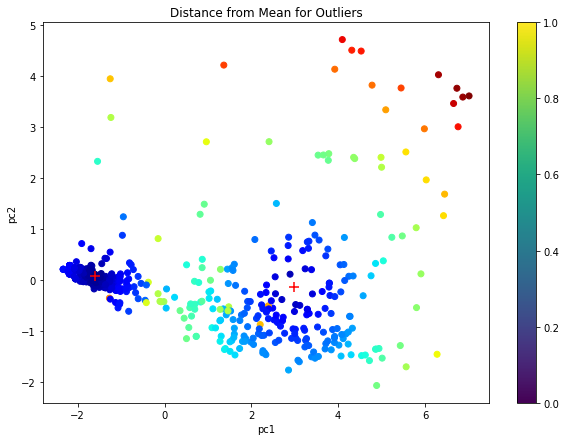

In [12]:
plt.figure(figsize=(10,7))
plt.scatter(x=projected1.pc1,y=projected1.pc2,c=projected1.distance,cmap='jet')
plt.scatter(class2_mean[0],class2_mean[1], marker='+',s=120,color='r')
plt.scatter(class4_mean[0],class4_mean[1], marker='+',s=120,color='r')
plt.title('Distance from Mean for Outliers')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.colorbar()
plt.show()

In [13]:
display(projected1.nlargest(5,'distance'))
data.iloc[467]

,pc1,pc2,class,score,location,distance
467,7.015848,3.606912,4,0.145627,"[7.0158478144069925, 3.6069119900895354]",5.517437
277,6.735665,3.757236,4,0.220156,"[6.73566535233293, 3.757236203092687]",5.422934
346,6.871979,3.584356,4,0.145627,"[6.871978683306541, 3.5843564172875797]",5.397324
632,6.311128,4.021976,4,0.500319,"[6.311127592013844, 4.021975874642413]",5.341722
290,6.659325,3.458309,4,0.247204,"[6.659324548435614, 3.458309208671052]",5.156878


Clump Thickness                 9
Uniformity of Cell Size        10
Uniformity of Cell Shape       10
Marginal Adhesion              10
Single Epithelial Cell Size    10
Bare Nuclei                     5
Bland Chromatin                10
Normal Nucleoli                10
Mitoses                        10
Class                           4
Name: 467, dtype: object

## Q3:

In plotting a histogram of the distribution, we can see a potential outlier point of 3.25.

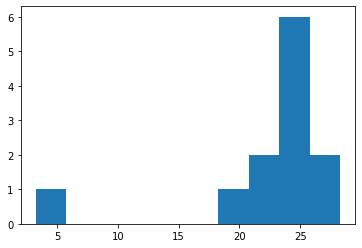

In [14]:
norm_data = [22.93, 20.69, 25.75, 23.84, 25.34, 3.25, 23.55, 28.28, 23.72, 22.42, 26.83, 23.82]
plt.hist(norm_data)
plt.show()

We then find the mean and standard deviation.

In [15]:
mean = np.mean(norm_data)
std = np.std(norm_data)

print('mean = ' + str(mean))
print('standard deviation = ' + str(std))

mean = 22.534999999999997
standard deviation = 6.130045540885756


Plotting the mean and 3xstandard deviation away from the mean as vertical lines indicates that this point is an outlier as it falls outside the 99.7% of data that lies within 3x the standard deviation from the mean.

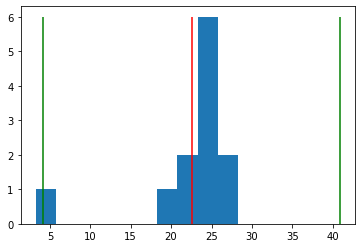

In [16]:
plt.hist(norm_data)
plt.vlines(mean,ymin=0,ymax=6, color='r')
plt.vlines(mean-3*std,ymin=0,ymax=6, color='g')
plt.vlines(mean+3*std,ymin=0,ymax=6, color='g')
plt.show()

As the difference between the mean and the potential outlier, divided by the standard deviation, is greater than 3.0, the probability that the value of 3.25 is generated by the normal distribution is less than 0.15% and so can be classed as an outlier. 

In [17]:
print('Difference between mean and potential outlier = ' + str(mean-3.25))
print('Difference divided by standard deviation = ' + str((mean-3.25)/std))

Difference between mean and potential outlier = 19.284999999999997
Difference divided by standard deviation = 3.1459798905855156


## Q4:

In [18]:
stocks = pd.read_csv('stocks.csv', header='infer') 
stocks.index = stocks['Date']
stocks = stocks.drop(['Date'],axis=1)
stocks.head()

,MSFT,F,BAC
Date,,,
1/3/2007,29.860001,7.51,53.330002
1/4/2007,29.809999,7.70,53.669998
1/5/2007,29.639999,7.62,53.240002
1/8/2007,29.930000,7.73,53.450001
1/9/2007,29.959999,7.79,53.500000


In [19]:
N,d = stocks.shape
delta = pd.DataFrame(100*np.divide(stocks.iloc[1:,:].values-stocks.iloc[:N-1,:].values, stocks.iloc[:N-1,:].values),
                    columns=stocks.columns, index=stocks.iloc[1:].index)
delta.head()

,MSFT,F,BAC
Date,,,
1/4/2007,-0.167455,2.529960,0.637532
1/5/2007,-0.570278,-1.038961,-0.801185
1/8/2007,0.978411,1.443570,0.394438
1/9/2007,0.100231,0.776197,0.093543
1/10/2007,-1.001332,-0.770218,0.149536


In [20]:
X = delta.iloc[:,0:].to_numpy()
len(X)
X

array([[-0.16745478,  2.52996005,  0.63753232],
       [-0.57027845, -1.03896104, -0.80118505],
       [ 0.97841096,  1.44356955,  0.39443838],
       ...,
       [-0.45827592, -1.1299435 , -1.23839446],
       [-0.14287982, -0.16326531, -1.47783251],
       [-1.20827182, -0.81766149,  0.45454545]])

In [21]:
ee = OneClassSVM(nu=0.01,gamma='auto')
yhat = ee.fit_predict(X)
print(len(yhat))

2517


In [22]:
delta['y'] = yhat
delta.head()

,MSFT,F,BAC,y
Date,,,,
1/4/2007,-0.167455,2.529960,0.637532,1
1/5/2007,-0.570278,-1.038961,-0.801185,1
1/8/2007,0.978411,1.443570,0.394438,1
1/9/2007,0.100231,0.776197,0.093543,1
1/10/2007,-1.001332,-0.770218,0.149536,1


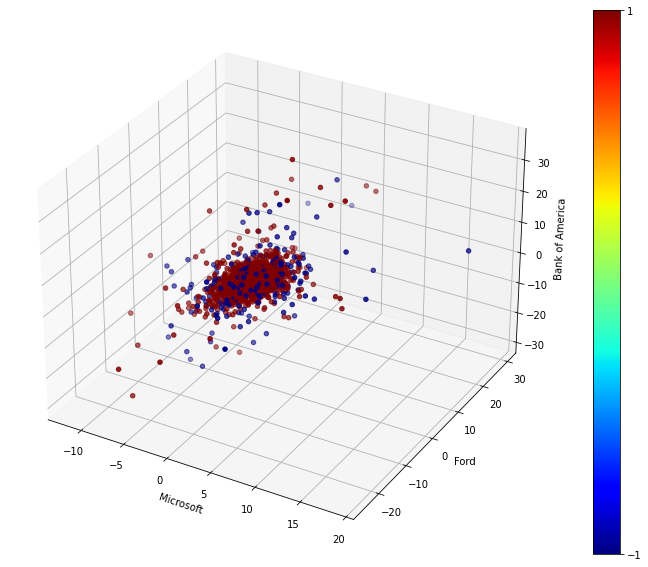

In [43]:
labels = [1,-1]
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(delta.MSFT,delta.F,delta.BAC,c=delta.y,cmap='jet')
ax.set_xlabel('Microsoft')
ax.set_ylabel('Ford')
ax.set_zlabel('Bank of America')
plt.colorbar(p,ticks=labels)
plt.show()

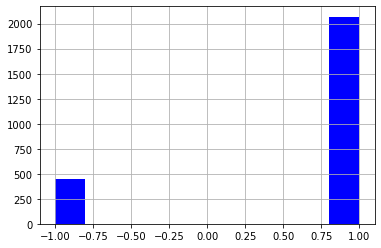

Percentage of points classed as outliers = 17.8%


In [24]:
delta['y'].hist(color='b')
plt.show()
len(delta[delta.y == -1])

print('Percentage of points classed as outliers = ' + str(round(len(delta[delta.y == -1])/len(delta)*100,1))+'%')

## Q5:

In [25]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = pd.read_csv(url, header=None)
df

scaler = StandardScaler()
Z = scaler.fit_transform(df)
# Extracting the values from the dataframe
#data = df.values

# Split dataset into input and output elements
X, y = Z[:, :-1], Z[:, -1]

# Summarize the shape of the dataset
print(X.shape, y.shape)


(506, 13) (506,)


In [26]:
pca = PCA(n_components=2)
projected = pca.fit_transform(X)

projected = pd.DataFrame(projected,columns=['pc1','pc2'])
projected.head()

,pc1,pc2
0,-2.098297,0.773112
1,-1.457252,0.591985
2,-2.074598,0.599639
3,-2.611504,-0.006871
4,-2.458185,0.097712


In [27]:
knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(projected)
distances, indices = nbrs.kneighbors(projected.values)

# The outlier score is set as the distance between the point and its k-th nearest neighbour
outlier_score = distances[:,knn-1]

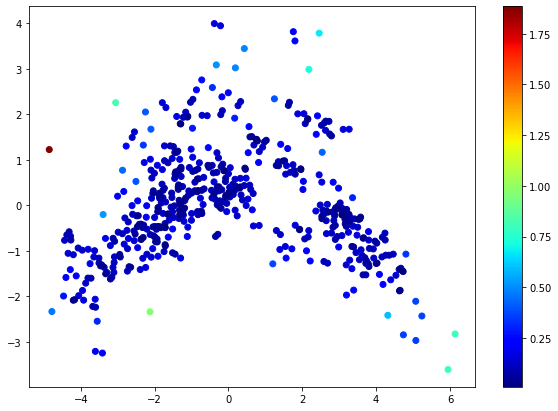

In [28]:
projected['score'] = outlier_score
plt.figure(figsize=(10,7))
plt.scatter(x=projected.pc1,y=projected.pc2,c=projected.score,cmap='jet')
plt.colorbar()
plt.show()